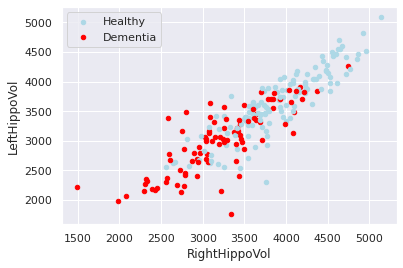

In [ ]:
#Jason Ton jht5qfn
#Sources and References:
#https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/
#https://medium.com/@rangavamsi5/na%C3%AFve-bayes-algorithm-implementation-from-scratch-in-python-7b2cc39268b9
#Used the slides and followed online tutorials 

#UPLOAD excel FILE TO WORKSPACE FIRST

import pandas as pd
import matplotlib as plt
import seaborn as sns
import statistics
import numpy as np
import math


#INSERT NAME OF CSV HERE
df = pd.read_csv(r'OASIS-hippocampus.csv')

RHIP = df['RightHippoVol']
LHIP = df['LeftHippoVol']
DEM = df['Dementia']
TRAINSET= df['TrainData']
colors = []


plt.pyplot.xlabel("RightHippoVol") 
plt.pyplot.ylabel("LeftHippoVol") 

for i in DEM:
  if(i==1):
    colors.append('red')
 
  else:
    colors.append('lightblue')

legends = []
for i in range(len(colors)):
  if( "Healthy" in legends and "Dementia" in legends):
    plt.pyplot.scatter(RHIP[i],LHIP[i],20, c =colors[i], label = '_nolegend_')
  elif(colors[i] == 'red'):
    plt.pyplot.scatter(RHIP[i],LHIP[i],20, c =colors[i], label = "Dementia")
    legends.append("Dementia")
  elif(colors[i] == 'lightblue'):
    plt.pyplot.scatter(RHIP[i],LHIP[i],20, c =colors[i], label = "Healthy")
    legends.append("Healthy")
plt.pyplot.legend()
#graph uses testing and training data

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

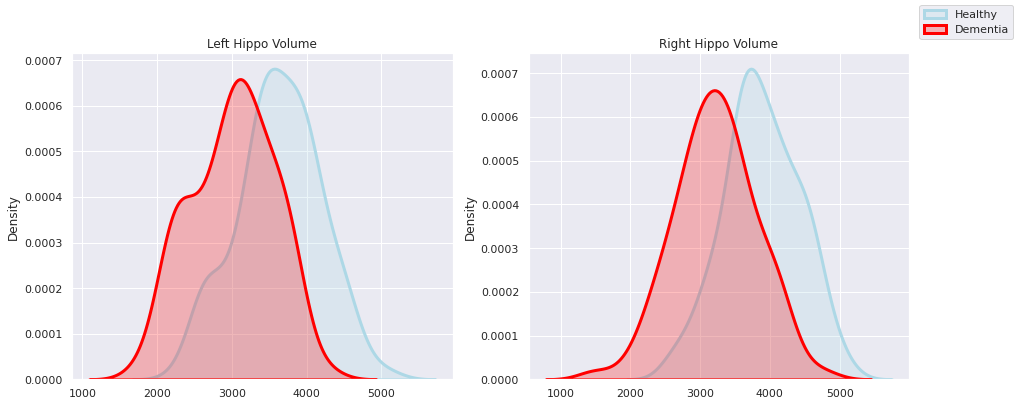

In [ ]:

#Right HIPPO Healthy and Dementia
RHIPH = []
RHIPD = []
LHIPH = []
LHIPD = []
train = pd.DataFrame()
test = pd.DataFrame()



for i in range(len(DEM)):
  if DEM[i] ==1:
    RHIPD.append(RHIP[i])
    LHIPD.append(LHIP[i])
  else:
    RHIPH.append(RHIP[i])
    LHIPH.append(LHIP[i])

for i in range(len(TRAINSET)):
  if TRAINSET[i] ==1:
    train =train.append(df.iloc[[i]])
  else:
    test =test.append(df.iloc[[i]])


fig, axes = plt.pyplot.subplots(1, 2, figsize = (15,6))
sns.set()

ax1 =sns.distplot(a=RHIPH, hist = False, kde = True, color ="lightblue", ax =axes[1],
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Healthy")
ax1 = sns.distplot(a=RHIPD, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, color ="red", ax =axes[1],
                  label = "Dementia")


ax2 = sns.distplot(a=LHIPH, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, color ="lightblue",ax =axes[0],
                  label = "Healthy")

ax2 = sns.distplot(a=LHIPD, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, color ="red",ax =axes[0],
                  label = "Dementia", )

ax1.set_title('Right Hippo Volume')
ax2.set_title('Left Hippo Volume')

fig.legend(labels=['Healthy','Dementia'])
plt.pyplot.show()
# visualizing plot using matplotlib.pyplot library
#graph uses testing and training data

In [ ]:



trainData = []
testData = []

for i in range(len(test)):
  testData.append([test["RightHippoVol"].values[i],test["LeftHippoVol"].values[i],test["Dementia"].values[i]])
for i in range(len(train)):
  trainData.append([train["RightHippoVol"].values[i],train["LeftHippoVol"].values[i],train["Dementia"].values[i]])



#Splits Training and Testing data and sets all needed variables
TestDF = pd.DataFrame(testData, columns =['RightHippoVol', 'LeftHippoVol','Dementia']) 
TrainDF = pd.DataFrame(trainData, columns =['RightHippoVol', 'LeftHippoVol','Dementia']) 

features = ["RightHippoVol","LeftHippoVol"]
likelihoods = {}
prior_probabilities = {}
X_train  = TrainDF.drop([TrainDF.columns[-1]], axis = 1)
y_train = TrainDF[TrainDF.columns[-1]]

train_size = len(X_train)
num_feats = len(X_train.axes[1])

#Method for training
def training( X, y):
	for feature in features:
		likelihoods[feature] = {}
		for result in (y_train):
			likelihoods[feature].update({result:{}})
			prior_probabilities.update({result: 0})
	#Calculating probabilities of  having dementia and being healthy

	for outcome in [0,1]:
		outcome_count = 0
		for i in range(len(y)):
			if y[i]==outcome:
				outcome_count= outcome_count+1
		prior_probabilities[outcome] = outcome_count / train_size
	#Calculating means and variances for both features "RightHippoVol" and "LeftHippoVol" and their respective healthy/ dementia results (4 values in total)
	#Stroing for lature use
	for feature in features:
		for outcome in [0,1]:
			likelihoods[feature][outcome]['mean'] = X_train[feature][y_train[y_train == outcome].index.values.tolist()].mean()
			likelihoods[feature][outcome]['variance'] = X_train[feature][y_train[y_train == outcome].index.values.tolist()].var()
	 
#method for running the naive gaussian bayes classifier
def predict(HippoValues):
	first= 1
	second = 1
	second_scale = 0
	first_scale = 0
	HippoValues = np.array(HippoValues)
	for result in [0,1]:
		prior_prob = prior_probabilities[result]
		if(prior_prob==1):
				prior_prob2 = prior_probabilities[0]
		else:
			prior_prob2 =  prior_probabilities[1]
				
			#getting mean and variance of certain feature and outcome

		mean = likelihoods['RightHippoVol'][result]['mean']
		var = likelihoods['RightHippoVol'][result]['variance']
		mean2 = likelihoods['LeftHippoVol'][result]['mean']
		var2 = likelihoods['LeftHippoVol'][result]['variance']
		#ses the equation we learned in class
		if(result==1):
			second = (1/math.sqrt(2*math.pi*var)) * np.exp(-(HippoValues[0][0] - mean)**2 / (2*var)) * (1/math.sqrt(2*math.pi*var)) * np.exp(-(HippoValues[0][1] - mean2)**2 / (2*var2))
			second_scale = (second * prior_prob)/prior_prob2
		elif(result == 0):
			first = (1/math.sqrt(2*math.pi*var)) * np.exp(-(HippoValues[0][0] - mean)**2 / (2*var)) * (1/math.sqrt(2*math.pi*var)) * np.exp(-(HippoValues[0][1] - mean2)**2 / (2*var2))
			first_scale = (first * prior_prob)/prior_prob2


		#picking the max between the probabiliity of a data point belonging to the 0 or 1 class (Healthy vs Dementia)
	if(second_scale>first_scale):
		result = 1
	else:
		result = 0


	return result

 

training(X_train, y_train)


predictions = []
actual = []
for i in range(len(test)):
  query = np.array([[test["RightHippoVol"].values[i],test["LeftHippoVol"].values[i]]])
  predictions.append(predict(query))

for i in range(len(test)):
	actual.append(TestDF["Dementia"].values[i])
 

matches = 0

for i in range(len(predictions)):
	if(predictions[i]==actual[i]):
		matches+=1

accuracy = round((matches/len(actual))*100,2)

print("Model accuracy (on testing data) : "+ str(accuracy) + "%")


 

Model accuracy (on testing data) : 70.8%
